<a href="https://colab.research.google.com/github/Bareera2505/Deep-Learning-Labs/blob/main/Lab_2_PyTorch_Basics_Bareera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 2: PyTorch Basics

In [209]:
import torch
import numpy as np

## Part 1: Tensors

Tensors operate much like numpy arrays, but have additional properties which allow them to be used more easily in machine learning, such as being compatible with GPUs and other hardware accelerators and being optimized for automatic differentiation.

### Tensor Attributes

**Shape**: A tuple (n1, n2, ... nd) indicating the dimesions of the Tensor. To refer to a particular dimension, use `dim`, (instead of `axis` for `np.array`).


**Datatype**: Form of the data stored in the Tensor. Common datatypes include `torch.float`, `torch.long`, `torch.bool`. See https://pytorch.org/docs/stable/tensors.html for full list.

**Device**: Default device is `torch.device('cpu')`. If you want to use your GPU, be sure that your PyTorch installation has CUDA compatibility. If you have a GPU available, you can set the device to `torch.device('cuda')`

*Note*: If you have more than 1 GPU available, you can choose which gpu you would like to use by providing a device index. For example, `torch.device('cuda:0')` or `torch.device('cuda', index= 0)`

In [210]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


### Tensor Initialization

Like numpy arrays, Tensors can be initialized directly from data (in the form of a list or numpy array), or from random or constant values.

Tensors can also be converted into numpy arrays using `numpy()`. To do this, the Tensor must have its device set to `cpu`, or it will cause an error. You can easily move a Tensor to the cpu using `cpu()`. Similarly, you can move a Tensor to the GPU using `cuda()`.

In [211]:
#From data
data = [[1, 2], [3,4]]
x_data = torch.tensor(data)

#From Numpy Array
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

#From anaother tensor
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

x_np = x_rand.cpu().numpy() #Move tensor to the cpu and then convert to numpy array

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.9575, 0.8002],
        [0.1162, 0.1813]]) 



In [212]:
#Random and constant values
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.6661, 0.4336, 0.2267],
        [0.2885, 0.1034, 0.1681]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


### Tensor Operations

Many of the artihmetic operations for Tensors are equivalent to those for numpy arrays, such as:
<ul>
<li>Indexing</li>
<li>Slicing</li>
<li>Matrix Multiplication (`@` or `tensor.matmul` )</li>
<li>Elementwise Multiplication (`*` or `tensor.mul`)</li>
<li>Addition and Subtraction</li>
</ul>

To concatenate two Tensors, the you use `torch.cat`, which is similar to `np.concatenate`.

In [213]:
tensor = torch.ones(4, 4)
#Matrix Multiplication
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)

#Elementwise Multiplication
z1 = tensor * tensor
z2 = tensor.mul(tensor)

t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])


Single-element items can be converted to a Python numerical value using `item()`

In [214]:
agg = tensor.sum()
agg_item = agg.item()
print(agg_item, type(agg_item))

16.0 <class 'float'>


## Part 2: Neural Net Models

In [215]:
from torch import nn

### Defining a Model

The base class for any model in PyTorch is `nn.Module`. Every model that you building should have a `forward` function, which defines how your model processes input data.

In [216]:
class ExModel(nn.Module):
  '''
  Example model: A simple, two-layer NN with ReLU activation. 
  Input dimension is 100, output dimension is 1.
  '''
  def __init__(self):
    super(ExModel, self).__init__()
    self.layer1 = nn.Linear(100, 50)
    self.act1 = nn.ReLU()
    self.output_layer = nn.Linear(50, 1)

  def forward(self, x):
    x = self.layer1(x)
    x = self.act1(x)
    output= self.output_layer(x)
    return output


model = ExModel()
print(model)

ExModel(
  (layer1): Linear(in_features=100, out_features=50, bias=True)
  (act1): ReLU()
  (output_layer): Linear(in_features=50, out_features=1, bias=True)
)


To process `input` using your model, simply call `model(input)`. Do not call `model.forward()` directly!

In [217]:
batch_size = 64
input = torch.rand(batch_size, 100)
predictions = model(input)
print(predictions.shape)

torch.Size([64, 1])


### Graph-based computation: Parameters, Autograd, and Optimization

In [218]:
#Define hyperparameters for your training before initializing the optimizer
learning_rate = 1e-1
batch_size = 64
epochs = 5

**Loss Function**

We start by defining a loss function. For Regression, the most common loss function is `nn.MSELoss` (Mean Square Error). For classification, the most common losses are `nn.NLLLoss` (Negative Log Likelihood) or `nn.CrossEntropy` (which combines `nn.LogSoftmax` and `nn/NLLLoss`).

In [219]:
#Initialize the loss Function
loss_fn = nn.MSELoss()

**Optimizer**

Choose the optimizer you wish to use from those found in `torch.optim`. Commonly used optimizers include `SGD` and `Adam`. You can find the full list at https://pytorch.org/docs/stable/optim.html.

When you define the optimizer, you must give the parameters the optimizer is optimizing. If all your parameters are contained in your model class, you can access them using `model.parameters()`.

In [220]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

**Training Steps**

For each iteration in the training loop, optimization occurs in three steps:
- Call `optimizer.zero_grad()` to reset the gradients of the model parameters. By default, the gradients accumulate, so this ensures that the optimizer is not double-counting </li>
-Backpropagate the prediction loss with a call to `loss.backward()`. This causes PyTorch to deposit the gradients of the loss with respect to each parameter. </li>
- Call `optimizer.step()` to update the parameters according to the optimization scheme and gradients calculated in the backwards pass. </li>

In [221]:
#Randomly generate data and labels
data = torch.rand(batch_size, 100)
labels = torch.rand(batch_size, 1)
epochs = 10

#Training epochs
for epoch in range(epochs):
  optimizer.zero_grad()
  out = model(data)           #Generate predictions using the model
  loss = loss_fn(out, labels) #Loss/error
  print(f'Training Loss: {loss:.4f}')
  loss.backward()            #Propagate the gradients in backward pass
  optimizer.step()           #Update the weights


Training Loss: 0.1940
Training Loss: 0.0847
Training Loss: 0.0774
Training Loss: 0.0741
Training Loss: 0.0724
Training Loss: 0.0711
Training Loss: 0.0698
Training Loss: 0.0686
Training Loss: 0.0674
Training Loss: 0.0662


### Saving and Loading Models

The weights of a model are stored in a `state_dict`. You can train a model's state dictionary alone, or the entire model (including size and other hyperparameters). To load the weights of a model, use `model.load_statedict()`.

In [222]:
#Saving a model state_dict
model = ExModel()
torch.save(model.state_dict(), 'model_weights.pth')
model.load_state_dict(torch.load('model_weights.pth'))  #Load model weights


#Saving a full model
model = ExModel()
torch.save(model, 'model.pth')
model = torch.load('model.pth') #Load full model

During training, you can also save the state of your optimizer, which similarly has a state dictionary. This is especially important if you are using momentum-based optimizers (such as Adam).

In [223]:
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
torch.save(optimizer.state_dict(), 'optimizer_state.pth')
optimizer.load_state_dict(torch.load('optimizer_state.pth'))

Often time, you might want to save many quantities at the same time when training a model. These can include:
- Model weights/state
- Optimizer weights/state
- Training loss
- Validation loss

One common way to say all of these at once is using a dictionary. You can access all relevant quantities at a point in training in a single checkpoint.

Note: You do not always need to save the model at each epoch. You may wish to define a `save_interval` to determine how often you save the weights.

In [224]:
#Randomly generate data and labels
data = torch.rand(batch_size, 100)
labels = torch.rand(batch_size, 1)
epochs = 10
train_losses = []

#Training epochs
for epoch in range(epochs):
  optimizer.zero_grad()
  out = model(data)           #Generate predictions using the model
  loss = loss_fn(out, labels) #Loss/error
  train_losses.append(loss)
  loss.backward()            #Propagate the gradients in backward pass
  optimizer.step()
  ckpt = {'train_losses': train_losses, 'model_weights': model.state_dict(),  # Define checkpoint
          'optimizer_state': optimizer.state_dict()}                          # dictionary
  torch.save(ckpt, f'trained_model_e{epoch}.ckpt')  #Save checkpoint for each epoch

## Example: Iris Classification

In [225]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# Scale data to have mean 0 and variance 1 
# which is importance for convergence of the neural network
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=2)

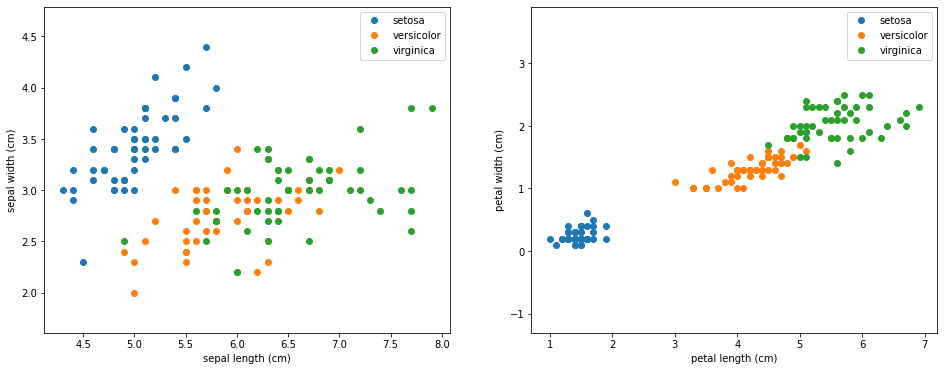

In [226]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax1.plot(X_plot[:, 0], X_plot[:, 1], 
             linestyle='none', 
             marker='o', 
             label=target_name)
ax1.set_xlabel(feature_names[0])
ax1.set_ylabel(feature_names[1])
ax1.axis('equal')
ax1.legend();

for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax2.plot(X_plot[:, 2], X_plot[:, 3], 
             linestyle='none', 
             marker='o', 
             label=target_name)
ax2.set_xlabel(feature_names[2])
ax2.set_ylabel(feature_names[3])
ax2.axis('equal')
ax2.legend();

In [227]:
import torch.nn.functional as F
class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 3)
        
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

In [228]:
model     = Model(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn   = nn.CrossEntropyLoss()
model

Model(
  (layer1): Linear(in_features=4, out_features=50, bias=True)
  (layer2): Linear(in_features=50, out_features=50, bias=True)
  (layer3): Linear(in_features=50, out_features=3, bias=True)
)

In [229]:
import tqdm

EPOCHS  = 100
X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).long()
X_test  = torch.from_numpy(X_test).float()
y_test  = torch.from_numpy(y_test).long()

loss_list     = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list[epoch] = loss.item()
    
    # Zero gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    with torch.no_grad():
        y_pred = model(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean()

100%|██████████| 100/100 [00:00<00:00, 768.26it/s]


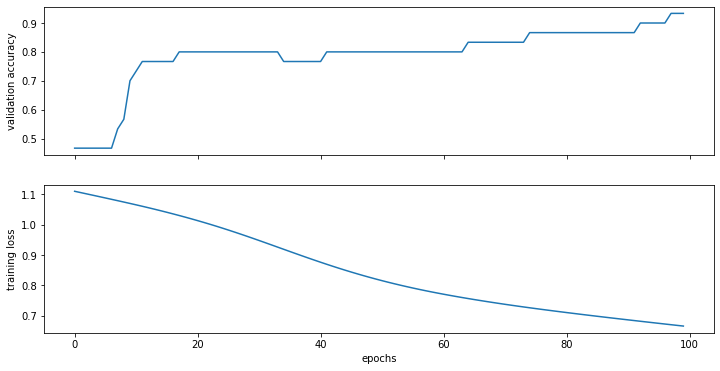

In [230]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

ax1.plot(accuracy_list)
ax1.set_ylabel("validation accuracy")
ax2.plot(loss_list)
ax2.set_ylabel("training loss")
ax2.set_xlabel("epochs");

## Lab Assignment: MNIST Classification Task

Design your own MNIST Classification model (see video recording for explanation of MNIST dataset). You may choose your own hyperparameters, including:
- Number of layers
- Number of neurons in each layer
- Learning rate
- Number of training epochs
- Optimizer

Using a fully-connected network, you should be able to accomplish >90% accuracy on the test set. Please report your hyperparameter selections and accuracy in a summary at the end of the notebook.

To load the MNIST dataset, we will use `torchvision`, which contains the datasets and has useful transformations. Start by defining the batch size you want for your training and test sets

In [232]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms


# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [233]:
# Hyper-parameters 
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

In [234]:
# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='../../data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='../../data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

In [235]:
# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

In [236]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # Move tensors to the configured device
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/5], Step [100/600], Loss: 0.2862
Epoch [1/5], Step [200/600], Loss: 0.3064
Epoch [1/5], Step [300/600], Loss: 0.1996
Epoch [1/5], Step [400/600], Loss: 0.3734
Epoch [1/5], Step [500/600], Loss: 0.1364
Epoch [1/5], Step [600/600], Loss: 0.1112
Epoch [2/5], Step [100/600], Loss: 0.1156
Epoch [2/5], Step [200/600], Loss: 0.1467
Epoch [2/5], Step [300/600], Loss: 0.0672
Epoch [2/5], Step [400/600], Loss: 0.0422
Epoch [2/5], Step [500/600], Loss: 0.1034
Epoch [2/5], Step [600/600], Loss: 0.0899
Epoch [3/5], Step [100/600], Loss: 0.0478
Epoch [3/5], Step [200/600], Loss: 0.0689
Epoch [3/5], Step [300/600], Loss: 0.0479
Epoch [3/5], Step [400/600], Loss: 0.0651
Epoch [3/5], Step [500/600], Loss: 0.0388
Epoch [3/5], Step [600/600], Loss: 0.0480
Epoch [4/5], Step [100/600], Loss: 0.2300
Epoch [4/5], Step [200/600], Loss: 0.0684
Epoch [4/5], Step [300/600], Loss: 0.0497
Epoch [4/5], Step [400/600], Loss: 0.0532
Epoch [4/5], Step [500/600], Loss: 0.0397
Epoch [4/5], Step [600/600], Loss:

In [238]:
# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
       

    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))

# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')

Accuracy of the network on the 10000 test images: 97.96 %


A. I changed epoch ranges, used adam as optimizer as it is one of the best optimizers I also used Neural instead of Multipreceptron as it worked better for me. Luckily first learnign rate worked for me else I woud have considered changing that too.

Hyper-parameters 
input_size = 784

hidden_size = 500

num_classes = 10

num_epochs = 5

batch_size = 100

learning_rate = 0.001 

Activation/optimizer: Adam
